# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |
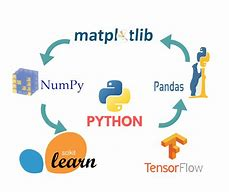
---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import  pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt 
import seaborn as sns 

# Libraries for data preparation and model building
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42 ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |
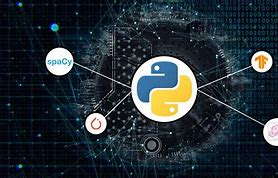
---

In [6]:
#load the data
df_train = pd.read_csv("df_train.csv")
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [7]:
#load the data
df_test = pd.read_csv("df_test.csv")
df_test.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |
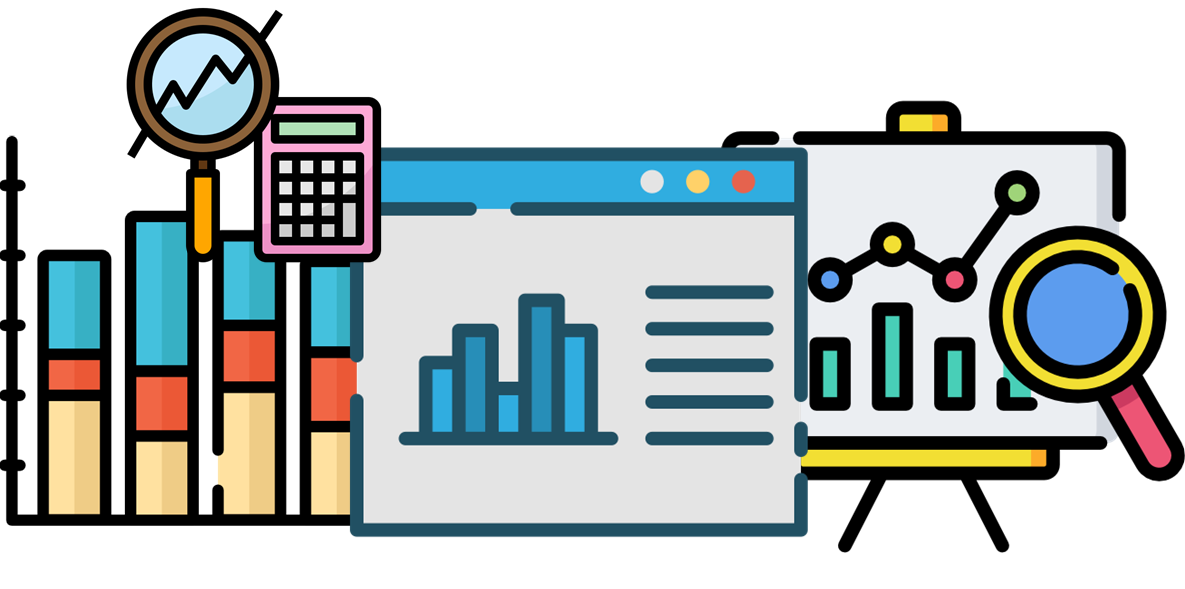
---


In [8]:
# look at data statistics
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [9]:
# look at data statistics
df_train.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

In [10]:
# look at data statistics
df_train.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [11]:
# look at data statistics
df_train.isnull().sum() #Check for null values

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [12]:
# look at data statistics
df_train.skew()

C:\Users\user\AppData\Local\Temp\ipykernel_15760\817962830.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.skew()


Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

In [13]:
# look at data statistics
df_train.kurtosis()

C:\Users\user\AppData\Local\Temp\ipykernel_15760\1044361950.py:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.kurtosis()


Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

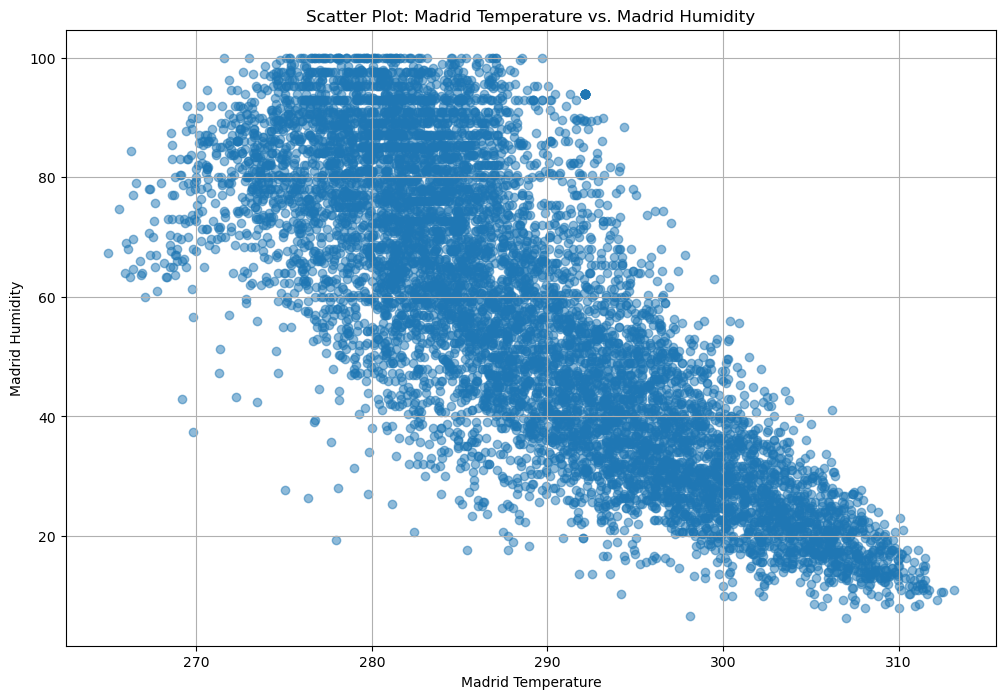

In [15]:
# plot relevant feature interactions
#Scatter plot of Madrid temperature vs. Madrid humidity
plt.figure(figsize=(12, 8))
plt.scatter(df_train['Madrid_temp'], df_train['Madrid_humidity'], alpha=0.5)
plt.title('Scatter Plot: Madrid Temperature vs. Madrid Humidity')
plt.xlabel('Madrid Temperature')
plt.ylabel('Madrid Humidity')
plt.grid(True)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_15760\4236626432.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Bilbao_clouds_all'])


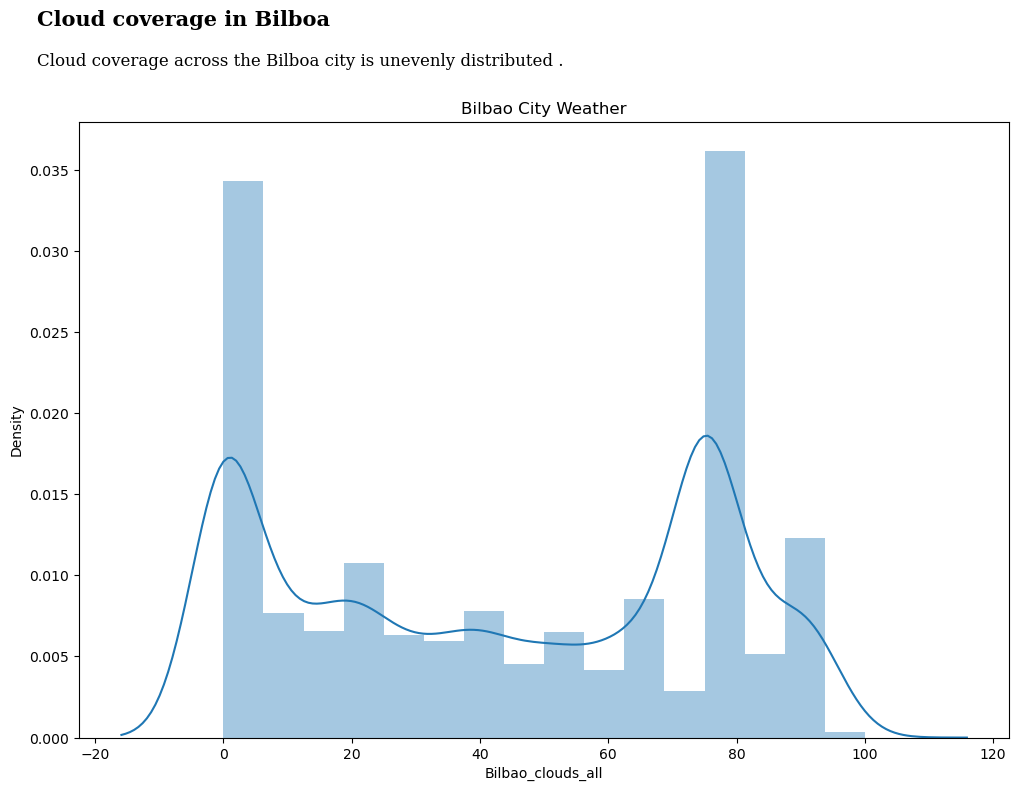

In [18]:
#Checking cloud coverage in Bilboa
fig = plt.figure(figsize=(12, 8))
sns.distplot(df_train['Bilbao_clouds_all'])
plt.title('Bilbao City Weather')
fig.text(0.09, 1, 'Cloud coverage in Bilboa', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Cloud coverage across the Bilboa city is unevenly distributed .', fontsize=12, fontweight='light', fontfamily='serif')
plt.show()

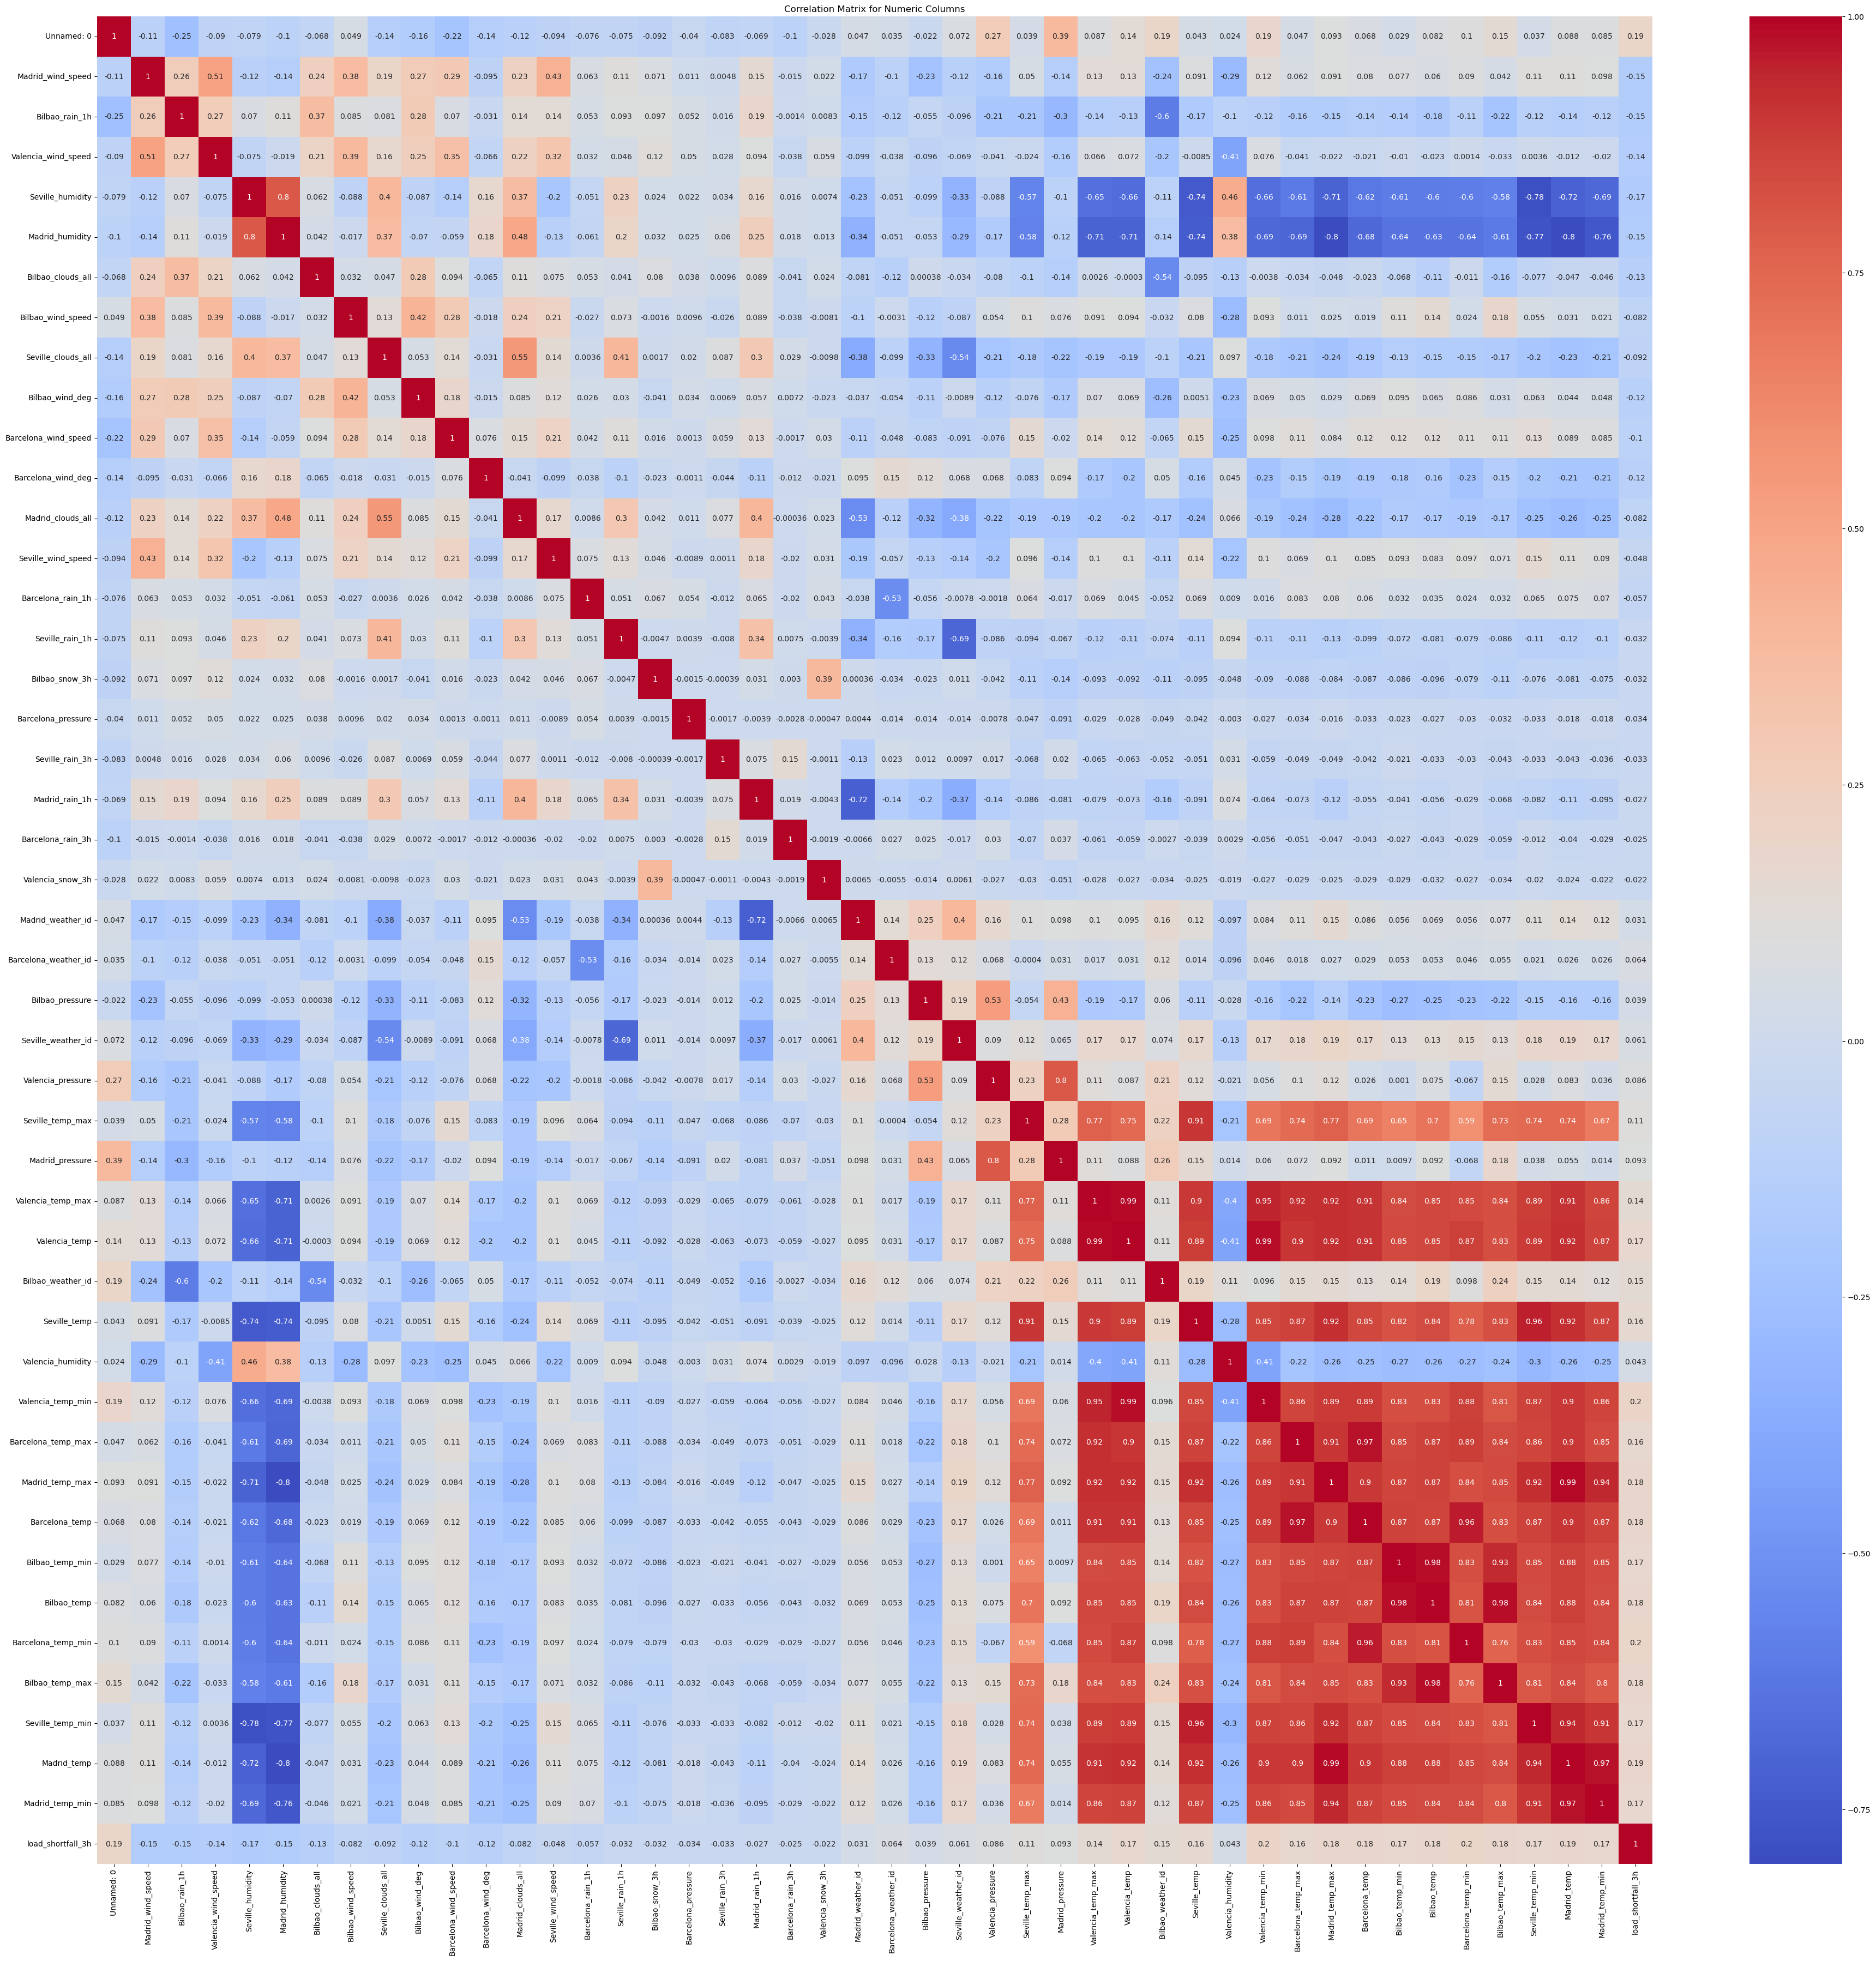

In [21]:
# evaluate correlation
numeric_columns = df_train.select_dtypes(include=[np.number]) # Select only numeric columns

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Visualize the correlation matrix
plt.figure(figsize=(46, 44))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Columns')
plt.show()

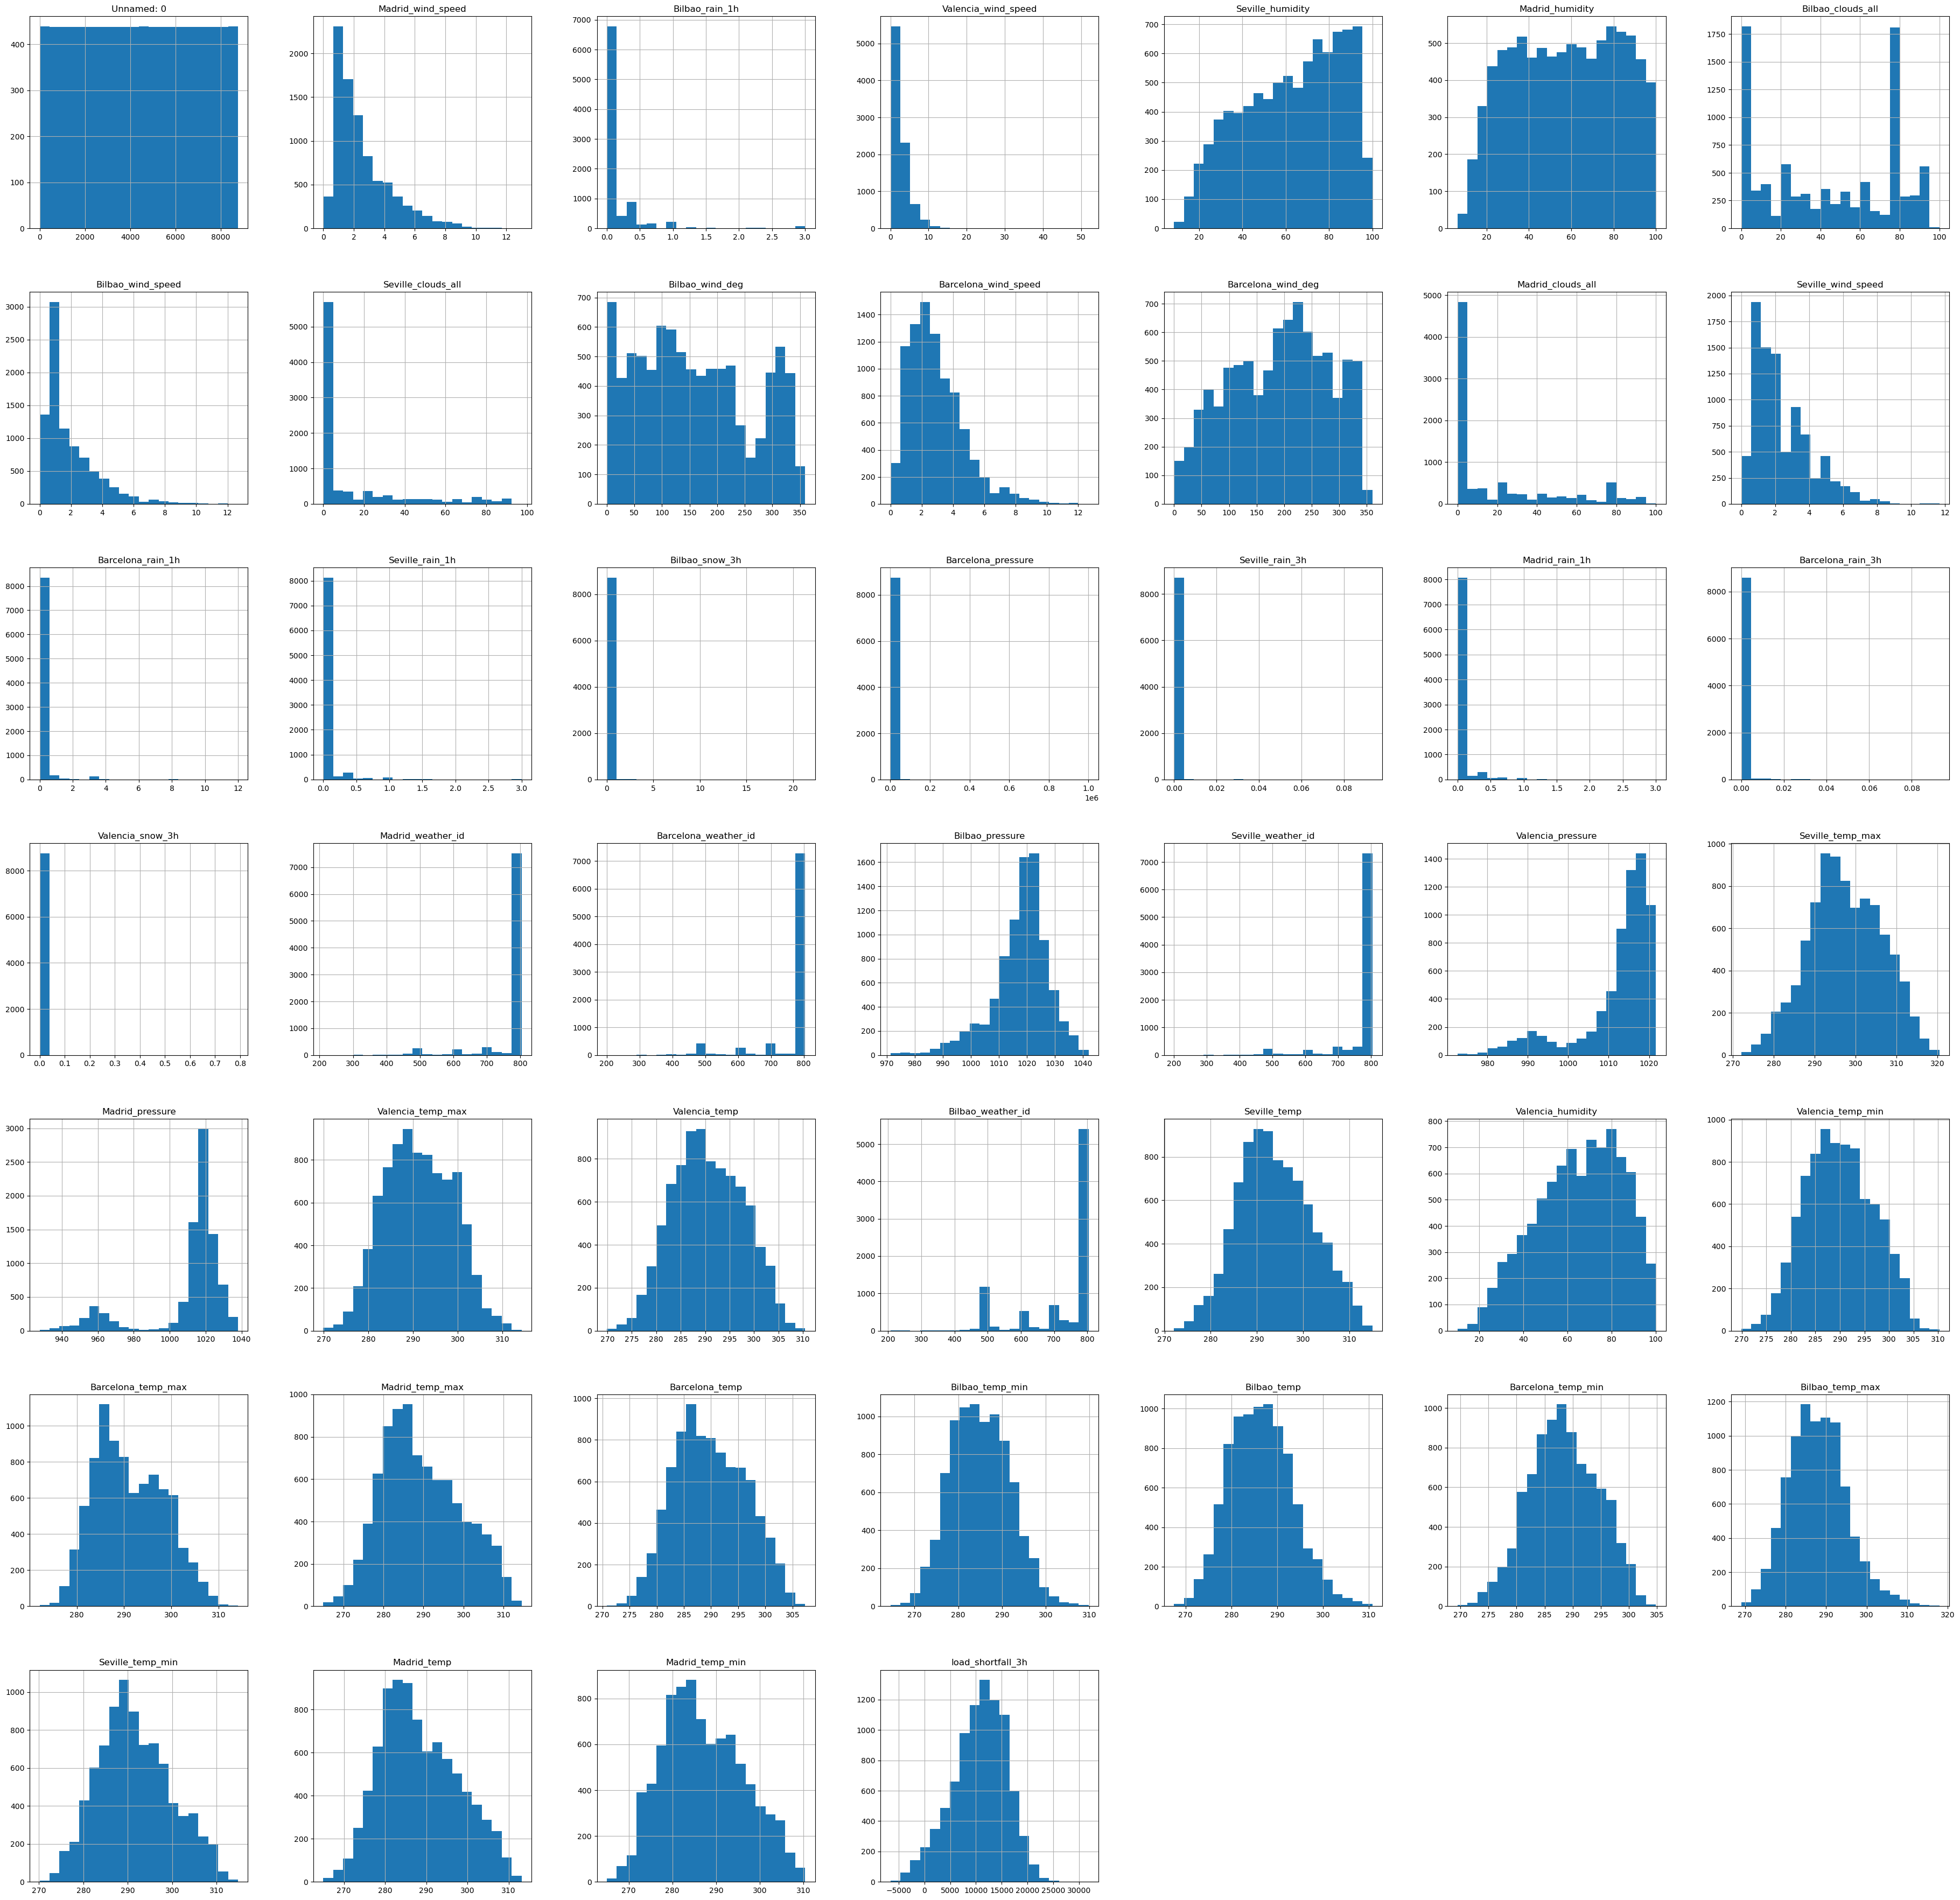

In [22]:
# have a look at feature distributions
df_train.hist(bins=20, figsize=(46, 45)) # Histograms for numerical columns
plt.show()

In [25]:
#Bar graph for average shortfall for different time periods
humidity_data = {
    'Valencia_humidity': df_train['Valencia_humidity'],
    #Humidity data for Barcelona and Bilbao is not int he database
    'Madrid_humidity': df_train['Madrid_humidity']
}

df_humidity = pd.DataFrame(humidity_data)

# Aggregate the averages in humidities of each all cities and create a new 'Average_humidity' column
df_humidity['Average_Humidity'] = df_humidity.mean(axis=1)

#Median tempaerature in Spain 
median_humidity_in_Spain = np.median(df_humidity.Average_Humidity)
print("Median humidity in Spain: ", median_humidity_in_Spain)

Median humidity in Spain:  61.166666666699996


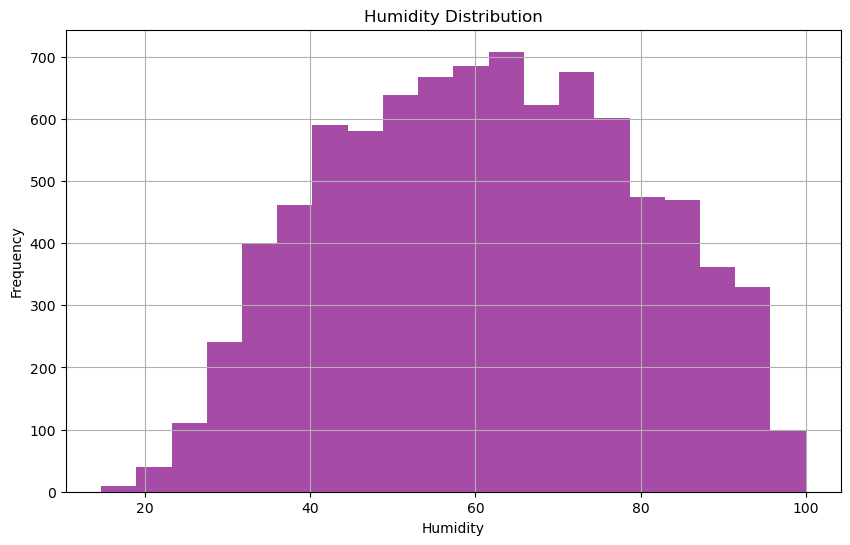

In [26]:
# Create a histogram to see Humidity distribution 
plt.figure(figsize=(10, 6))
plt.hist(df_humidity.Average_Humidity, bins=20, color='purple', alpha=0.7)
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Humidity Distribution')
plt.grid(True)
plt.show()

In [27]:
#Average wind speeds in Spain
wind_speed_data = {
    'Valencia_wind_speed': df_train['Valencia_wind_speed'],
    'Barcelona_wind_speed': df_train['Barcelona_wind_speed'],
    'Bilbao_wind_speed': df_train['Bilbao_wind_speed'],
    'Madrid_wind_speed': df_train['Madrid_wind_speed']
}

df_wind_speed = pd.DataFrame(wind_speed_data)

#Aggregate the wind speeds of all cities to create a new column
df_wind_speed['Average_wind_speeds'] = df_wind_speed.mean(axis=1)

#Median wind speed in Spain 
median_wind_in_Spain = np.median(df_wind_speed.Average_wind_speeds)
print("Median Wind speed in Spain: ", median_wind_in_Spain)

Median Wind speed in Spain:  2.083333333325


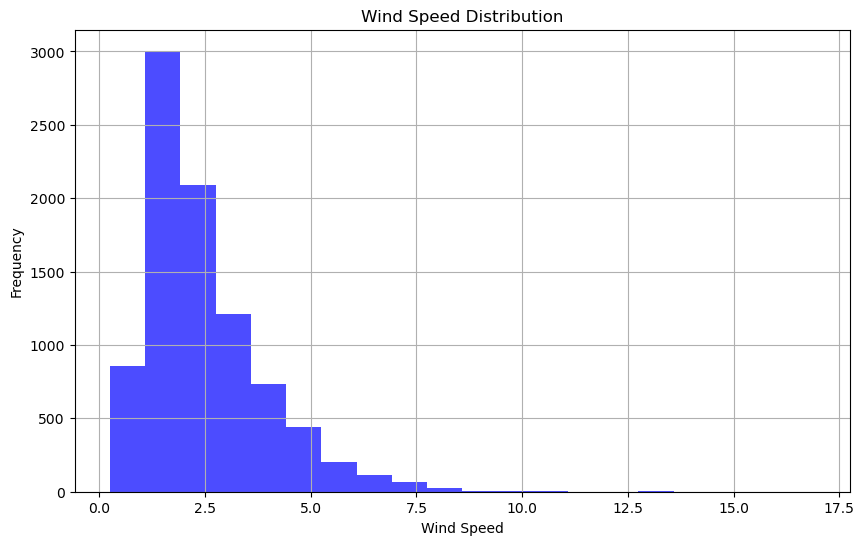

In [28]:
# Create a histogram to see wind speed distribution to see wind speed distribution
plt.figure(figsize=(10, 6))
plt.hist(df_wind_speed.Average_wind_speeds, bins=20, color='blue', alpha=0.7)
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.title('Wind Speed Distribution')
plt.grid(True)
plt.show()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |
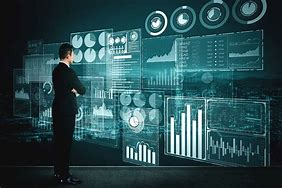
---

In [31]:
#Combine two datasets together
df=pd.concat((df_train,df_test))
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [32]:
df.shape

(11683, 49)

In [33]:
# remove missing values/ features
df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2522
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

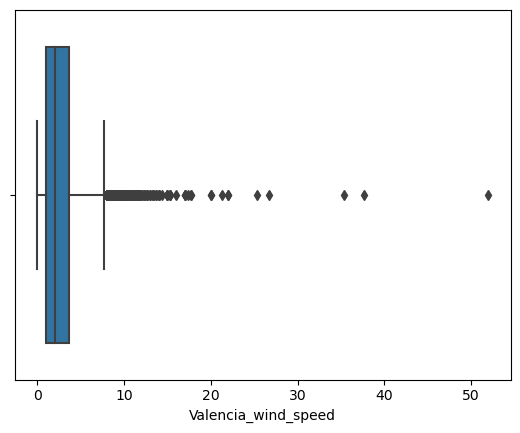

In [34]:
sns.boxplot(x='Valencia_wind_speed', data=df);

In [35]:
print ('Mode')
print (df['Valencia_pressure'].mode())
print ('Mean')
print (df['Valencia_pressure'].mean())
print ('Median')
print (df['Valencia_pressure'].median())

Mode
0    1018.0
Name: Valencia_pressure, dtype: float64
Mean
1012.3466870428987
Median
1015.0


In [36]:
df_clean = df
df_clean['Valencia_pressure']=df_clean['Valencia_pressure'].fillna(df_clean['Valencia_pressure']).mode()[0]

In [37]:
df_clean.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure          0
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [38]:
#Checking data types
df_clean.dtypes

Unnamed: 0                int64
time                     object
Madrid_wind_speed       float64
Valencia_wind_deg        object
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure         object
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_p

In [39]:
#Changing time to numeric
df_clean['time']

0       2015-01-01 03:00:00
1       2015-01-01 06:00:00
2       2015-01-01 09:00:00
3       2015-01-01 12:00:00
4       2015-01-01 15:00:00
               ...         
2915    2018-12-31 09:00:00
2916    2018-12-31 12:00:00
2917    2018-12-31 15:00:00
2918    2018-12-31 18:00:00
2919    2018-12-31 21:00:00
Name: time, Length: 11683, dtype: object

In [40]:
#COVERT TIME TO SERIES TIME
df_clean['time'] = pd.to_datetime(df_clean['time'])
df_clean.time

0      2015-01-01 03:00:00
1      2015-01-01 06:00:00
2      2015-01-01 09:00:00
3      2015-01-01 12:00:00
4      2015-01-01 15:00:00
               ...        
2915   2018-12-31 09:00:00
2916   2018-12-31 12:00:00
2917   2018-12-31 15:00:00
2918   2018-12-31 18:00:00
2919   2018-12-31 21:00:00
Name: time, Length: 11683, dtype: datetime64[ns]

In [41]:
#Changing Valencia_wind_deg from object to numeric
df_clean['Valencia_wind_deg'] 

0        level_5
1       level_10
2        level_9
3        level_8
4        level_7
          ...   
2915     level_9
2916     level_8
2917     level_6
2918     level_6
2919    level_10
Name: Valencia_wind_deg, Length: 11683, dtype: object

In [42]:
df_clean['Valencia_wind_deg'] = df_clean['Valencia_wind_deg'].str.extract('(\d+)')
df_clean['Valencia_wind_deg'] = pd.to_numeric(df_clean['Valencia_wind_deg'])
df_clean['Valencia_wind_deg']

0        5
1       10
2        9
3        8
4        7
        ..
2915     9
2916     8
2917     6
2918     6
2919    10
Name: Valencia_wind_deg, Length: 11683, dtype: int64

In [43]:
#Changing Valencia_wind_deg from object to numeric
df_clean['Seville_pressure'] = df_clean['Seville_pressure'].str.extract('(\d+)')
df_clean['Seville_pressure'] = pd.to_numeric(df_clean['Seville_pressure'])
df_clean['Seville_pressure']

0       25
1       25
2       25
3       25
4       25
        ..
2915    24
2916    24
2917    23
2918    23
2919    23
Name: Seville_pressure, Length: 11683, dtype: int64

In [45]:
#Adding seasons as new feature
df_clean.loc[df_clean['Month'].isin([1,2,3]),['winter','spring','summer','autumn']] = [1,0,0,0]
df_clean.loc[df_clean['Month'].isin([4,5,6]),['winter','spring','summer','autumn']] = [0,1,0,0]
df_clean.loc[df_clean['Month'].isin([7,8,9]),['winter','spring','summer','autumn']] = [0,0,1,0]
df_clean.loc[df_clean['Month'].isin([10,11,12]),['winter','spring','summer','autumn']] = [0,0,0,1]

df_clean = df_clean.astype(
    {
        'winter': int, 'summer': int, 'spring': int, 'autumn': int
    }
)

In [46]:
# create new features
#adding new feature for time to be usable in numeric
df_clean['Day'] = df_clean ['time'].dt.day
df_clean['Month'] = df_clean ['time'].dt.month
df_clean['Year'] = df_clean ['time'].dt.year
df_clean['Hour'] = df_clean ['time'].dt.hour
df_clean['Start_minute'] = df_clean ['time'].dt.minute
df_clean['start_seconds'] = df_clean ['time'].dt.second
df_clean['Start_weekend'] = df_clean ['time'].dt.weekday
df_clean['Start_week_of_year'] = df_clean ['time'].dt.isocalendar().week

df_clean.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Year,Hour,Start_minute,start_seconds,Start_weekend,Start_week_of_year,winter,spring,summer,autumn
0,0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,2015,3,0,0,3,1,1,0,0,0
1,1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,2015,6,0,0,3,1,1,0,0,0
2,2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,2015,9,0,0,3,1,1,0,0,0
3,3,2015-01-01 12:00:00,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,2015,12,0,0,3,1,1,0,0,0
4,4,2015-01-01 15:00:00,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,2015,15,0,0,3,1,1,0,0,0


In [51]:
## Dropping the index column 
df_clean = df_clean.drop(['Unnamed: 0'], axis = 1)

In [52]:
df_clean.dtypes

time                    datetime64[ns]
Madrid_wind_speed              float64
Valencia_wind_deg                int64
Bilbao_rain_1h                 float64
Valencia_wind_speed            float64
Seville_humidity               float64
Madrid_humidity                float64
Bilbao_clouds_all              float64
Bilbao_wind_speed              float64
Seville_clouds_all             float64
Bilbao_wind_deg                float64
Barcelona_wind_speed           float64
Barcelona_wind_deg             float64
Madrid_clouds_all              float64
Seville_wind_speed             float64
Barcelona_rain_1h              float64
Seville_pressure                 int64
Seville_rain_1h                float64
Bilbao_snow_3h                 float64
Barcelona_pressure             float64
Seville_rain_3h                float64
Madrid_rain_1h                 float64
Barcelona_rain_3h              float64
Valencia_snow_3h               float64
Madrid_weather_id              float64
Barcelona_weather_id     

In [54]:
#dropping Bilbao and Valencia snow as they have not entry
df_clean.drop(['Bilbao_snow_3h', 'Valencia_snow_3h'], axis=1)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Year,Hour,Start_minute,start_seconds,Start_weekend,Start_week_of_year,winter,spring,summer,autumn
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,0.0,...,2015,3,0,0,3,1,1,0,0,0
1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,0.0,...,2015,6,0,0,3,1,1,0,0,0
2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,0.0,...,2015,9,0,0,3,1,1,0,0,0
3,2015-01-01 12:00:00,1.000000,8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,0.0,...,2015,12,0,0,3,1,1,0,0,0
4,2015-01-01 15:00:00,1.000000,7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,0.0,...,2015,15,0,0,3,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,2018-12-31 09:00:00,0.333333,9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,0.0,...,2018,9,0,0,0,1,0,0,0,1
2916,2018-12-31 12:00:00,0.333333,8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,0.0,...,2018,12,0,0,0,1,0,0,0,1
2917,2018-12-31 15:00:00,1.000000,6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,0.0,...,2018,15,0,0,0,1,0,0,0,1
2918,2018-12-31 18:00:00,1.000000,6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,0.0,...,2018,18,0,0,0,1,0,0,0,1


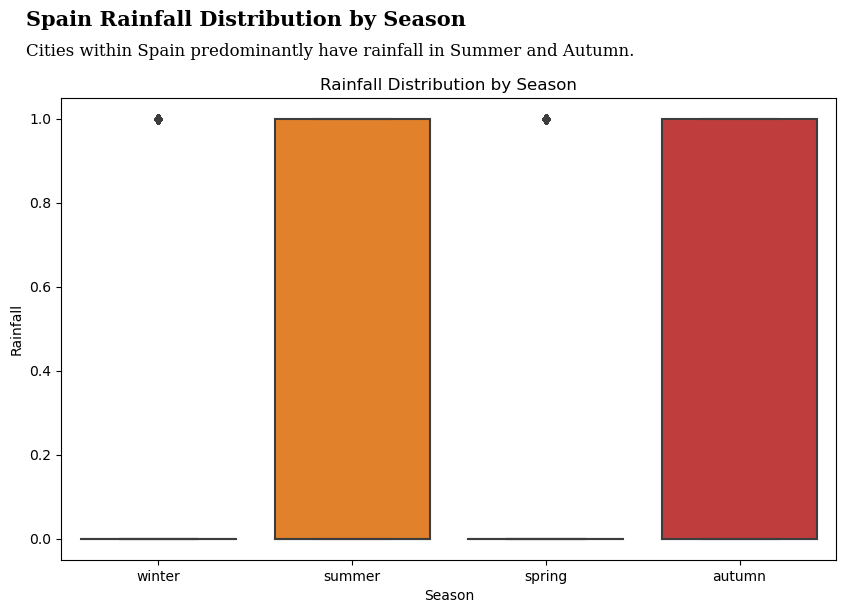

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))

# Reshape the data for the distribution plot
seasonal_data = df_clean.melt(id_vars=['Year'], value_vars=['winter', 'summer', 'spring', 'autumn'],
                                      var_name='Season', value_name='Rainfall')

# Create the distribution plot
sns.boxplot(x='Season', y='Rainfall', data=seasonal_data, ax=ax)

# Customize labels and title
ax.set_xlabel('Season')
ax.set_ylabel('Rainfall')
plt.title('Rainfall Distribution by Season')

# Add text to the figure
fig.text(0.09, 1, 'Spain Rainfall Distribution by Season', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Cities within Spain predominantly have rainfall in Summer and Autumn.', fontsize=12, fontweight='light', fontfamily='serif')

# Show the plot
plt.show()

In [49]:
# engineer existing features

# Average Load Shortfall in the morning(Between 6am and 12 pm):
df['time'] = pd.to_datetime(df['time']) # Convert time column into datetime data type
#Only morning shortfall
morning_shortfall = df[(df['time'].dt.time >= pd.to_datetime('06:00:00').time()) & 
                   (df['time'].dt.time <= pd.to_datetime('12:00:00').time())]
mean_morning_shortfall = morning_shortfall['load_shortfall_3h'].mean()
print("Average load shortfall in the morning: ", mean_morning_shortfall)

# Average Load Shortfall in the afternoon(Between 12pm and 6pm):
df['time'] = pd.to_datetime(df['time']) # Convert time column into datetime data type
#Only afternoon shortfall
afternoon_shortfall = df[(df['time'].dt.time >= pd.to_datetime('12:00:00').time()) & 
                   (df['time'].dt.time <= pd.to_datetime('17:00:00').time())]
mean_afternoon_shortfall = afternoon_shortfall['load_shortfall_3h'].mean()
print("Average load shortfall in the afternoon: ", mean_afternoon_shortfall)

# Average Load Shortfall in the evening(Between 6pm and 9pm):
df['time'] = pd.to_datetime(df['time']) # Convert time column into datetime data type
#Only evening shortfall
evening_shortfall = df[(df['time'].dt.time >= pd.to_datetime('18:00:00').time()) & 
                   (df['time'].dt.time <= pd.to_datetime('21:00:00').time())]
mean_evening_shortfall = evening_shortfall['load_shortfall_3h'].mean()
print("Average load shortfall in the evening: ", mean_evening_shortfall)

# Average Load Shortfall in the night(Between 9pm and 6am):
df['time'] = pd.to_datetime(df['time']) # Convert time column into datetime data type
#Only night shortfall
night_shortfall = df[(df['time'].dt.time >= pd.to_datetime('06:00:00').time()) & 
                   (df['time'].dt.time <= pd.to_datetime('21:00:00').time())]
mean_night_shortfall = night_shortfall['load_shortfall_3h'].mean()
print("Average load shortfall in the night: ", mean_night_shortfall)

Average load shortfall in the morning:  9843.421634225466
Average load shortfall in the afternoon:  12017.565525114156
Average load shortfall in the evening:  11554.366438356165
Average load shortfall in the night:  10723.066798539257


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |
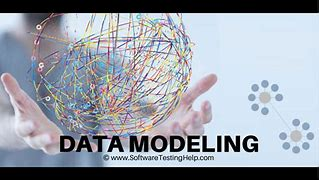
---

In [ ]:
# split data


In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |
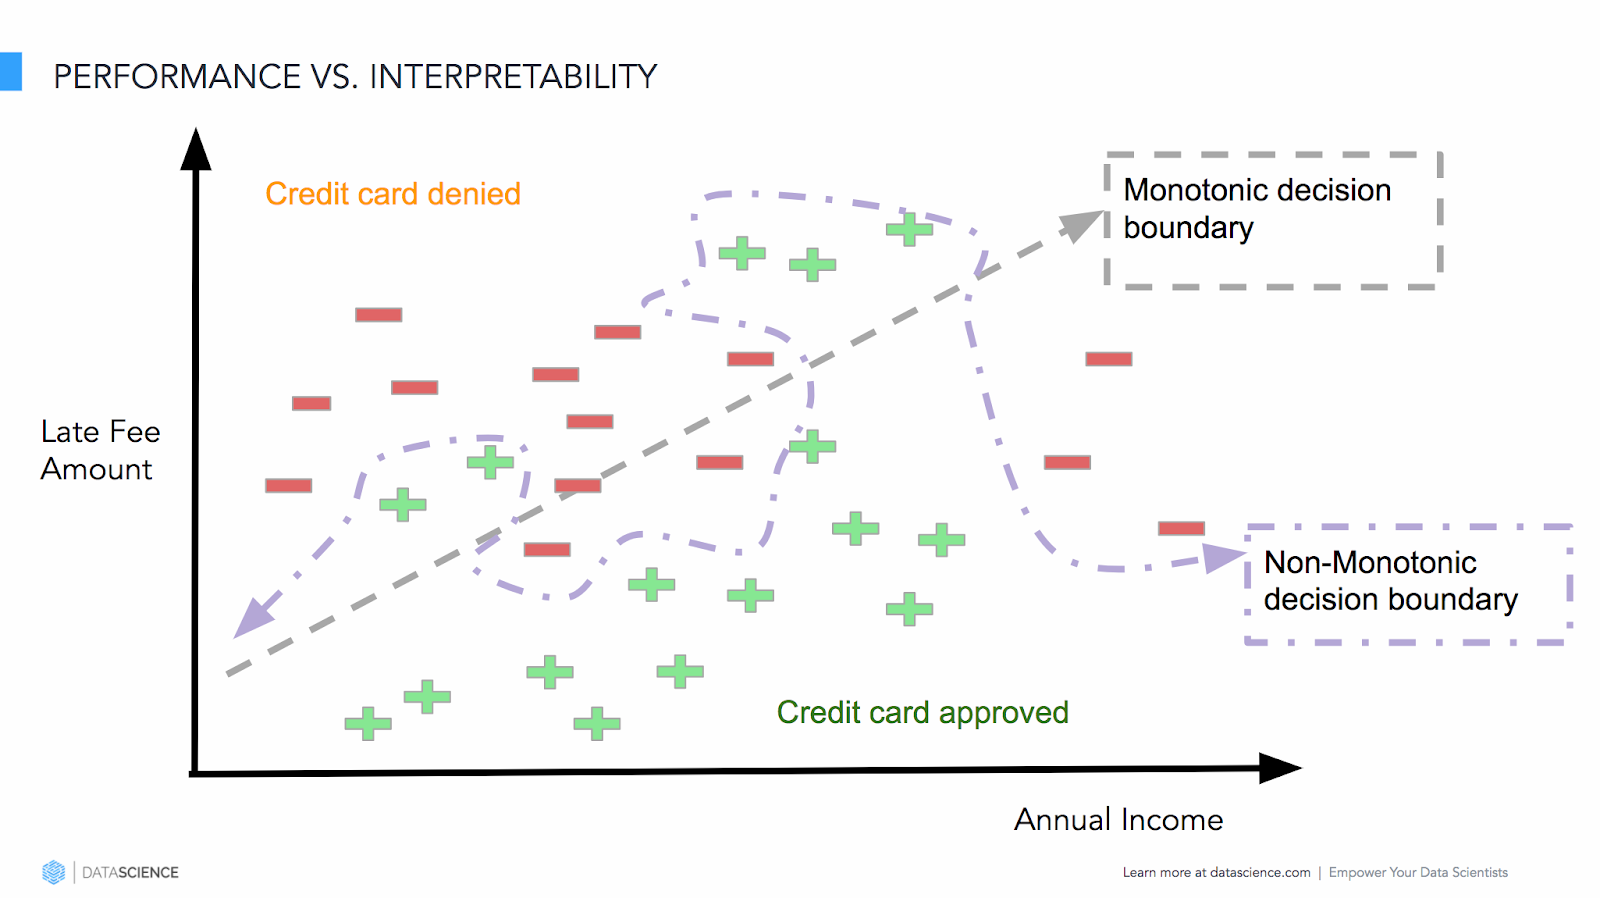
---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |
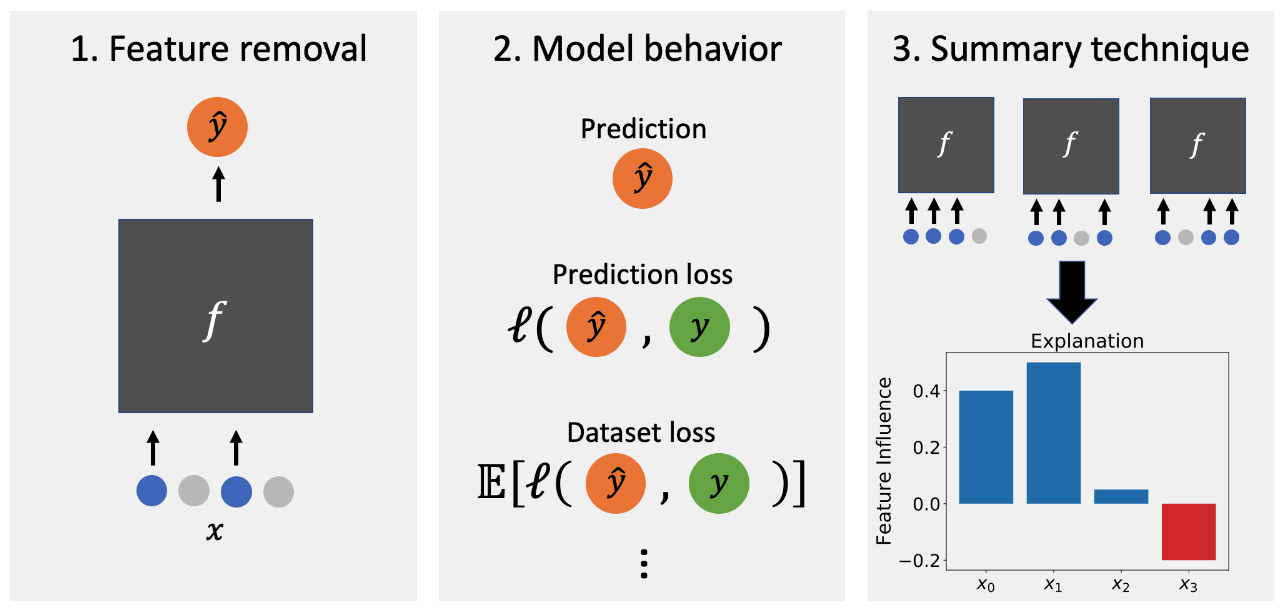
---

In [ ]:
# discuss chosen methods logic